# 서울시의 매출 데이터를 분석하여 패턴 파악하기

- 비율을 중심으로 설명 할 예정
- 연령별로 어떤 상품대가 가장 많은 매출의 비율을 기록하는지
- 비율이 비슷하다면, 서비스업종의 매출을 비교하여 어느쪽의 비중이 더 높은지 확인
- MZ세대 (10대~30대)를 중심으로 볼 것이며, 이들이 Main target이 될 것임

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

In [2]:
s2021=pd.read_csv('서울시데이터/서울시2021.csv',encoding='utf-8')
s2020=pd.read_csv('서울시데이터/서울시2020.csv',encoding='utf-8')
s2019=pd.read_csv('서울시데이터/서울시2019.csv',encoding='utf-8')
s2018=pd.read_csv('서울시데이터/서울시2018.csv',encoding='utf-8')
s2017=pd.read_csv('서울시데이터/서울시2017.csv',encoding='utf-8')
s2016=pd.read_csv('서울시데이터/서울시2016.csv',encoding='utf-8')

In [32]:
s2021.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [3]:
s2021.columns[:33]

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

In [4]:
slice2021=s2021.iloc[:,:33]
slice2020=s2020.iloc[:,:33]
slice2019=s2019.iloc[:,:33]
slice2018=s2018.iloc[:,:33]
slice2017=s2017.iloc[:,:33]
slice2016=s2016.iloc[:,:33]

In [5]:
slice2021['서비스_업종_코드_명'].unique()

array(['전자상거래업', '인테리어', '가전제품', '가구', '화초', '섬유제품', '완구', '운동/경기용품',
       '화장품', '문구', '의약품', '시계및귀금속', '안경', '가방', '신발', '일반의류', '반찬가게',
       '핸드폰', '컴퓨터및주변장치판매', '편의점', '슈퍼마켓', '피부관리실', '네일숍', '미용실', '스포츠클럽',
       '치과의원', '일반의원', '커피-음료', '분식전문점', '패스트푸드점', '제과점', '양식음식점',
       '일식음식점', '중식음식점', '한식음식점', '의료기기', '육류판매', '노래방', '고시원', '여관',
       '세탁소', '자동차수리', 'PC방', '골프연습장', '당구장', '한의원', '스포츠 강습', '호프-간이주점',
       '치킨전문점', '조명용품', '철물점', '애완동물', '서적', '청과상', '수산물판매', '미곡판매',
       '가전제품수리', '예술학원', '외국어학원', '일반교습학원', '자동차미용', '자전거 및 기타운송장비',
       '부동산중개업'], dtype=object)

In [6]:
# 1분기 데이터만 추출하고, 요일, 시간별, 연령별 매출 비율 비교
q1_2021=slice2021.loc[slice2021['기준_분기_코드']==1] # 분기가 1인 데이터만 가져옴
q1_2021.drop(['기준_년_코드','상권_구분_코드','상권_코드','서비스_업종_코드'],axis=1) # 필요없는 데이터 제거

,기준_분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
32378,1,관광특구,강남 마이스 관광특구,전자상거래업,5.246740e+05,5,0,100,0,0,...,0,0,0,100,0,0,100,0,0,0
32379,1,관광특구,강남 마이스 관광특구,가전제품,2.403139e+09,8727,65,35,11,9,...,37,1,41,42,1,16,21,15,18,13
32380,1,관광특구,강남 마이스 관광특구,가구,1.176752e+10,6378,52,48,11,7,...,24,0,43,57,0,2,12,35,22,29
32381,1,관광특구,강남 마이스 관광특구,화초,4.073456e+08,11502,68,32,11,15,...,34,2,53,27,0,11,33,22,10,4
32382,1,관광특구,강남 마이스 관광특구,섬유제품,8.173143e+08,27705,54,46,10,10,...,47,3,20,80,3,45,19,18,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64733,1,골목상권,계동길,제과점,1.656883e+08,18512,76,24,14,16,...,27,4,37,45,1,11,19,18,16,17
64734,1,골목상권,계동길,양식음식점,1.994485e+08,4442,54,46,8,10,...,48,2,40,43,0,28,25,9,15,6
64735,1,골목상권,계동길,일식음식점,6.032547e+07,1563,84,16,14,16,...,30,25,30,36,0,8,19,16,16,7
64736,1,골목상권,계동길,중식음식점,3.979185e+07,2042,68,32,14,12,...,35,1,39,49,10,33,15,13,12,5


In [7]:
q1_2021.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

- 업종별로 평균을 매겨서 요일, 연령대, 시간별 비율 환산

In [8]:
q1_2021['서비스_업종_코드_명'].unique()[0]

'전자상거래업'

In [9]:
a=q1_2021['서비스_업종_코드_명']=='전자상거래업'
b=q1_2021[a]

In [10]:
b=b.iloc[:,10:]
b_mean=b.mean()
b_mean

주중_매출_비율           79.947674
주말_매출_비율           20.110465
월요일_매출_비율          16.168605
화요일_매출_비율          17.587209
수요일_매출_비율          16.691860
목요일_매출_비율          12.680233
금요일_매출_비율          16.953488
토요일_매출_비율          12.784884
일요일_매출_비율           7.343023
시간대_00~06_매출_비율     0.127907
시간대_06~11_매출_비율     7.883721
시간대_11~14_매출_비율    23.273256
시간대_14~17_매출_비율    40.947674
시간대_17~21_매출_비율    25.755814
시간대_21~24_매출_비율     2.133721
남성_매출_비율           43.540698
여성_매출_비율           47.110465
연령대_10_매출_비율        0.598837
연령대_20_매출_비율       16.302326
연령대_30_매출_비율       21.470930
연령대_40_매출_비율       21.436047
연령대_50_매출_비율       17.750000
연령대_60_이상_매출_비율    13.250000
dtype: float64

In [11]:
b2=b_mean.to_frame()
b2.columns=['비율']
b2=b2.reset_index()
b2

,index,비율
0,주중_매출_비율,79.947674
1,주말_매출_비율,20.110465
2,월요일_매출_비율,16.168605
3,화요일_매출_비율,17.587209
4,수요일_매출_비율,16.691860
5,목요일_매출_비율,12.680233
6,금요일_매출_비율,16.953488
7,토요일_매출_비율,12.784884
8,일요일_매출_비율,7.343023
9,시간대_00~06_매출_비율,0.127907


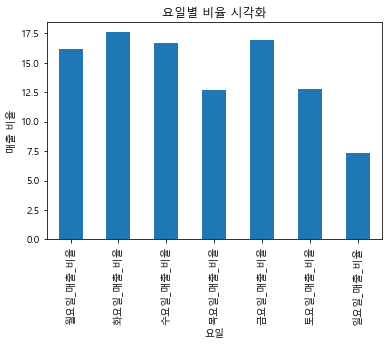

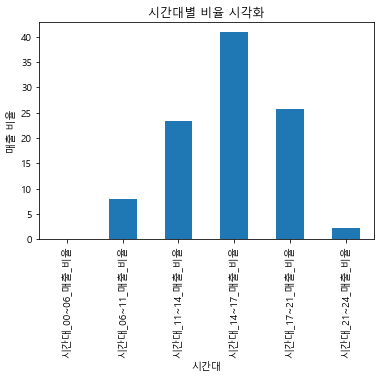

In [13]:
# 요일, 시간대, 성별, 나이별로 시각화

# 요일
b_mean[2:9].plot(kind='bar')
plt.title('요일별 비율 시각화')
plt.xlabel('요일')
plt.ylabel('매출 비율')
plt.xticks()
plt.show()

# 시간대
b_mean[9:15].plot(kind='bar')
plt.title('시간대별 비율 시각화')
plt.xlabel('시간대')
plt.ylabel('매출 비율')
plt.show()

- 반복문은 EDA2 반복문 note에

In [19]:
slice2021.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5836078.0,92,...,22,0,29,71,0,18,68,6,4,4


In [54]:
day=slice2021.groupby('서비스_업종_코드_명')[['월요일_매출_비율','화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율']].mean()
day=day.reset_index()
day.head(3)

,서비스_업종_코드_명,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
0,PC방,12.781081,12.310811,12.597297,12.121622,14.758108,18.350000,17.413514
1,가구,14.611260,12.975871,17.621984,12.292225,13.050938,16.597855,13.037534
2,가방,13.023474,14.286385,15.136150,14.704225,14.131455,17.230047,11.671362


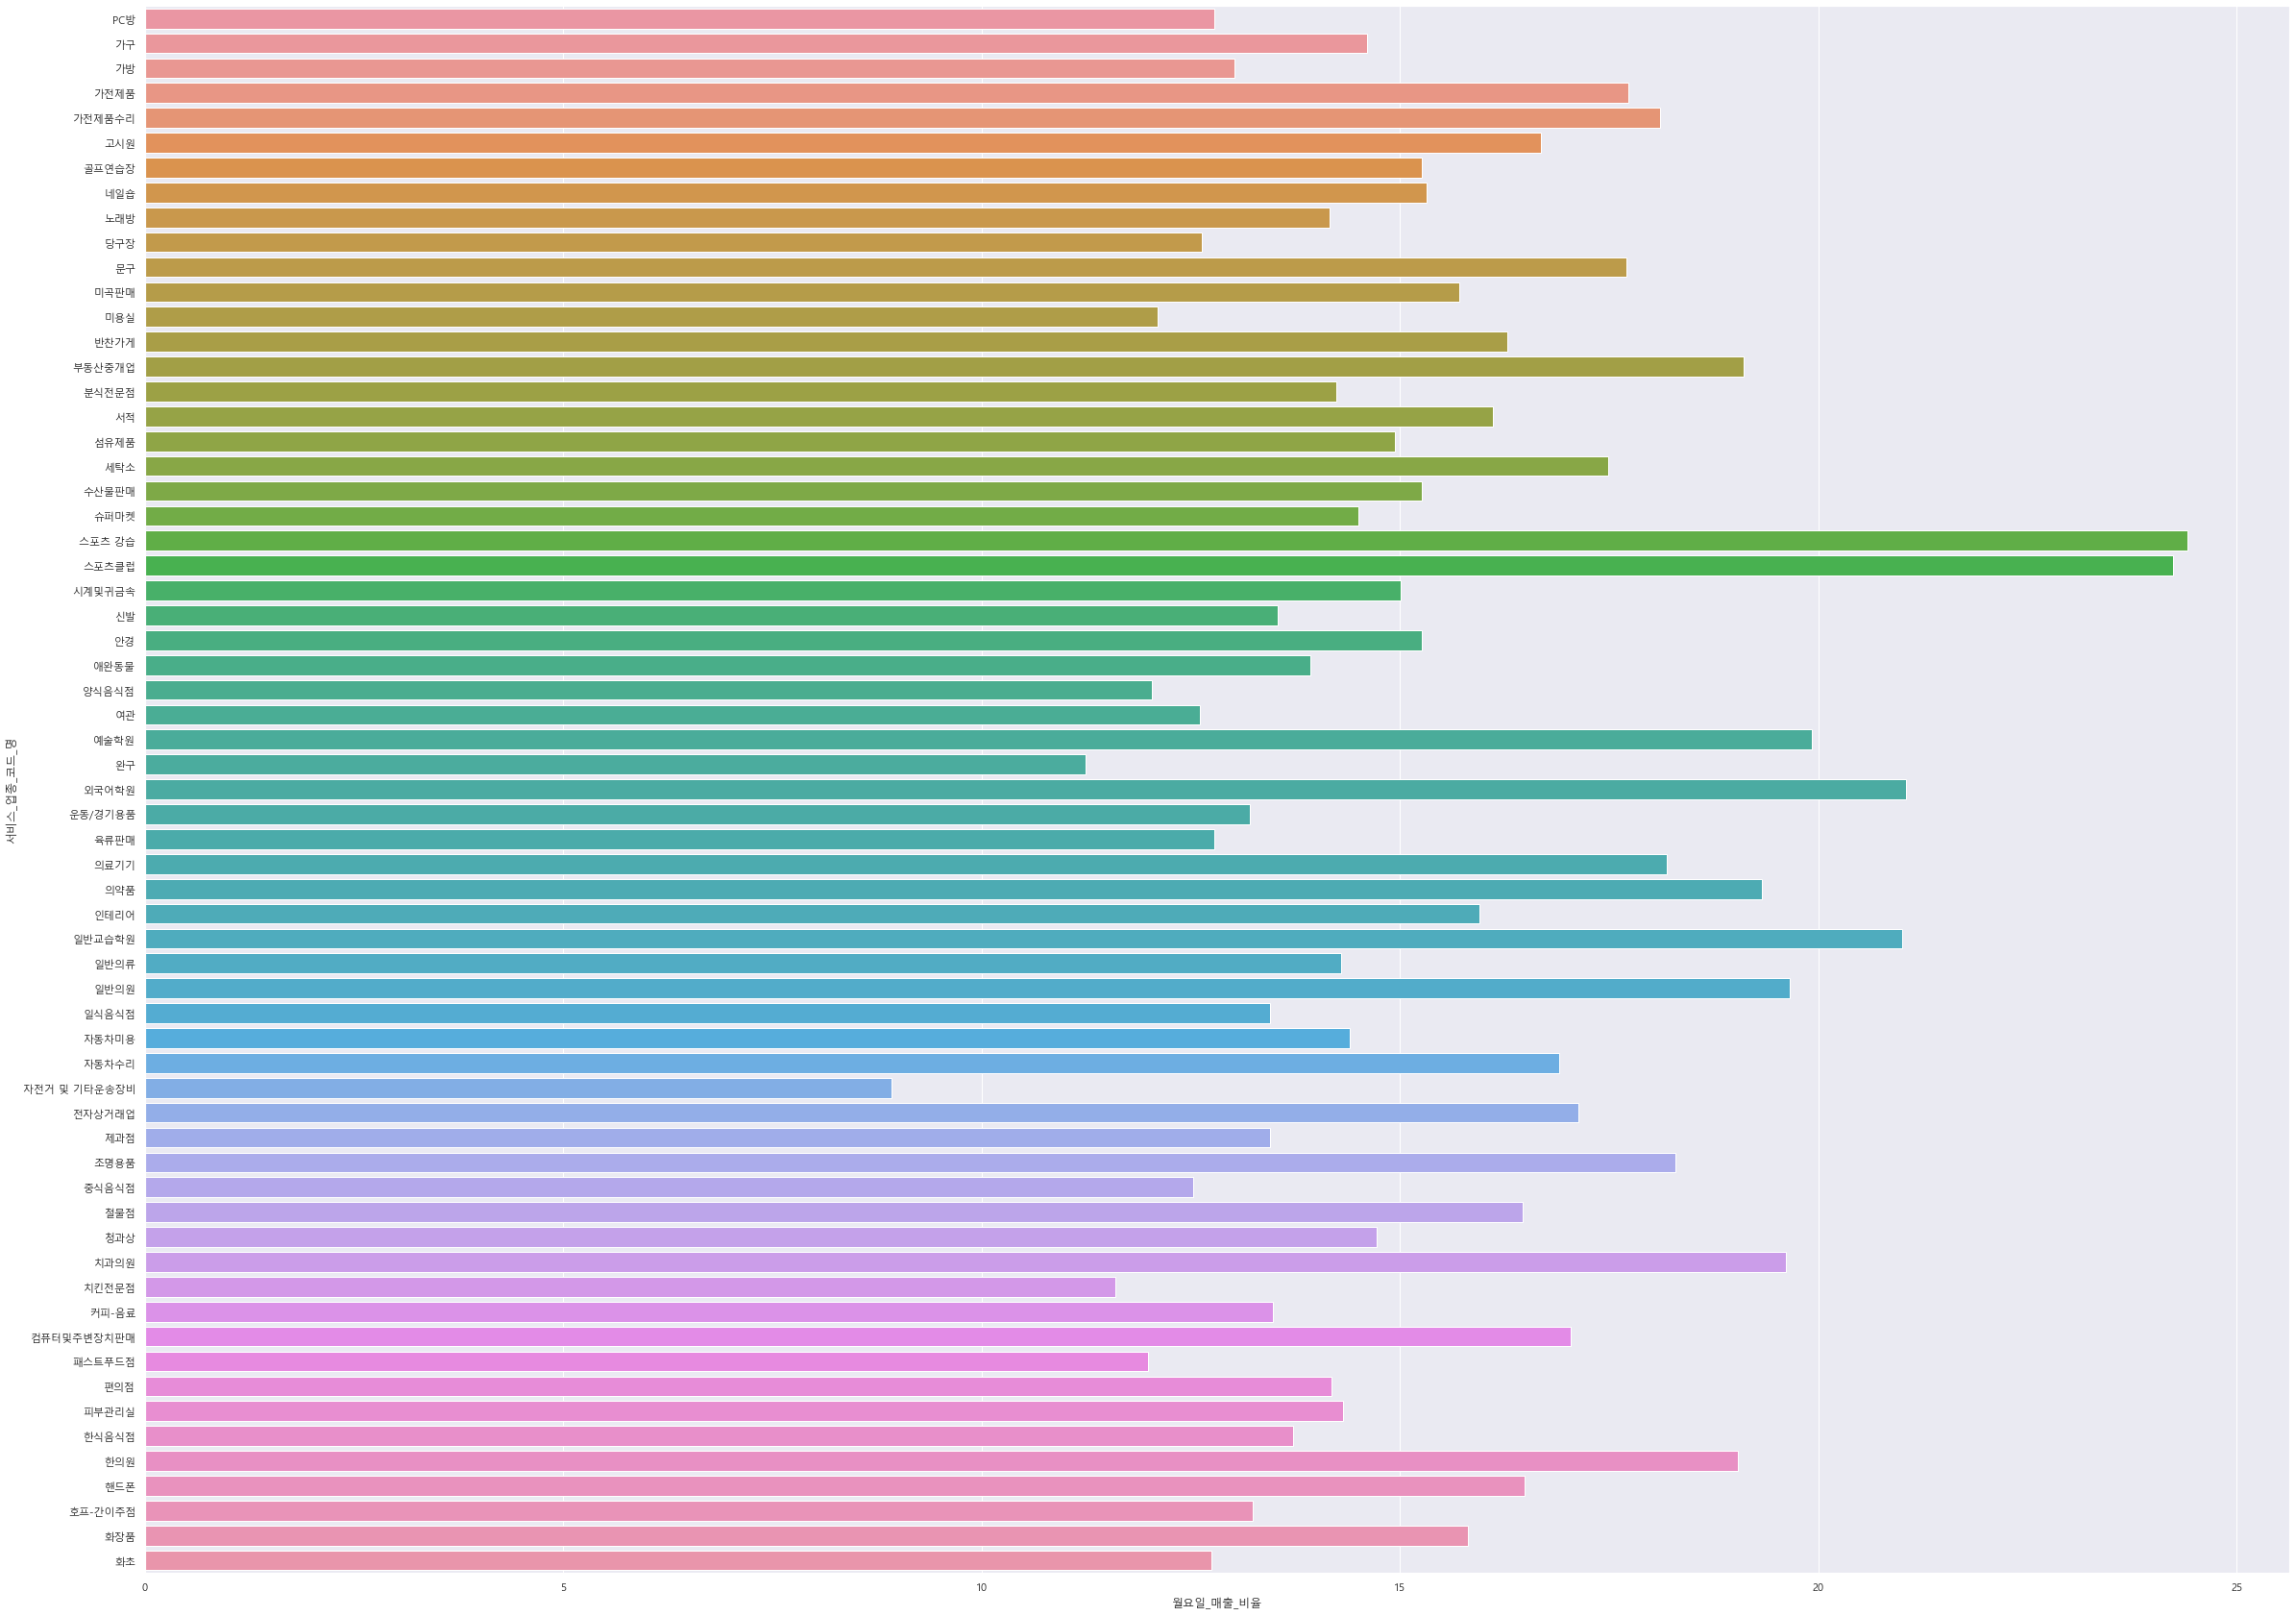

In [55]:
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)
sns.barplot(data=day,x='월요일_매출_비율',y='서비스_업종_코드_명')
sns.set(rc = {'figure.figsize':(40,30)})
plt.show()

In [57]:
time=slice2021.groupby('서비스_업종_코드_명')[['시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율']].mean()
time=time.reset_index()

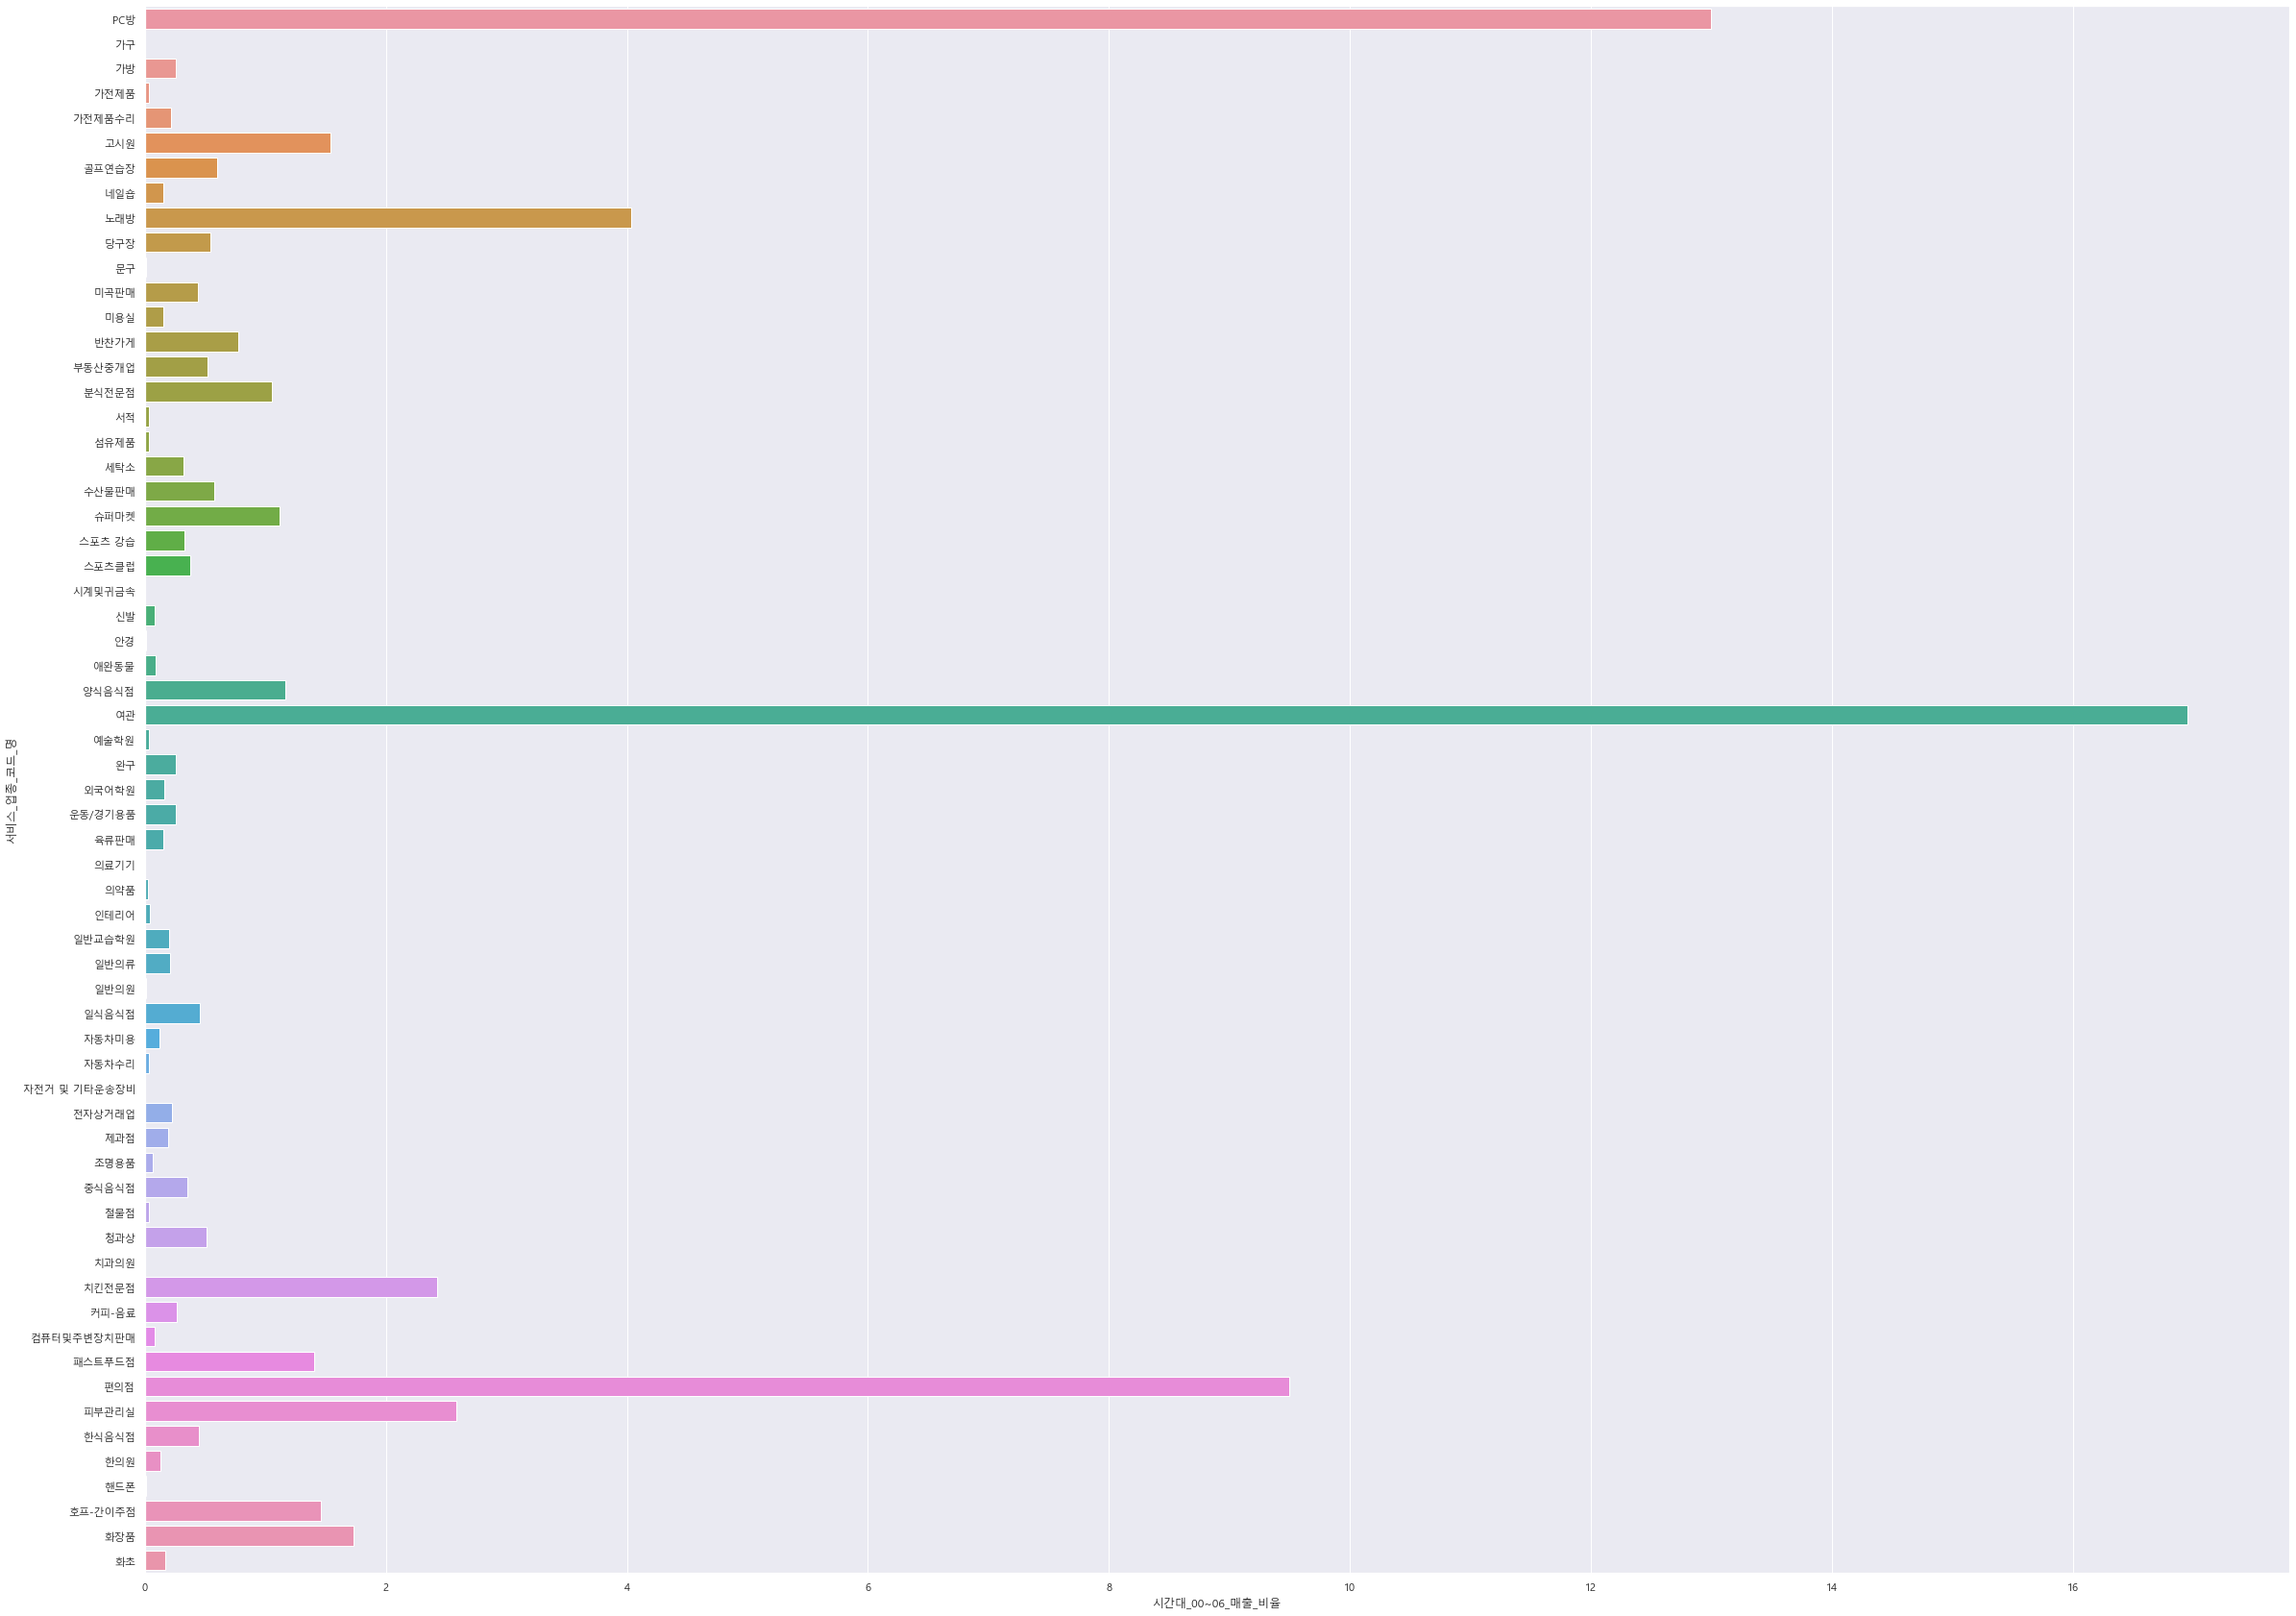

In [59]:
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)
sns.barplot(data=time,x='시간대_00~06_매출_비율',y='서비스_업종_코드_명')
sns.set(rc = {'figure.figsize':(50,35)})
plt.rc
plt.show()

<AxesSubplot:xlabel='서비스_업종_코드_명'>

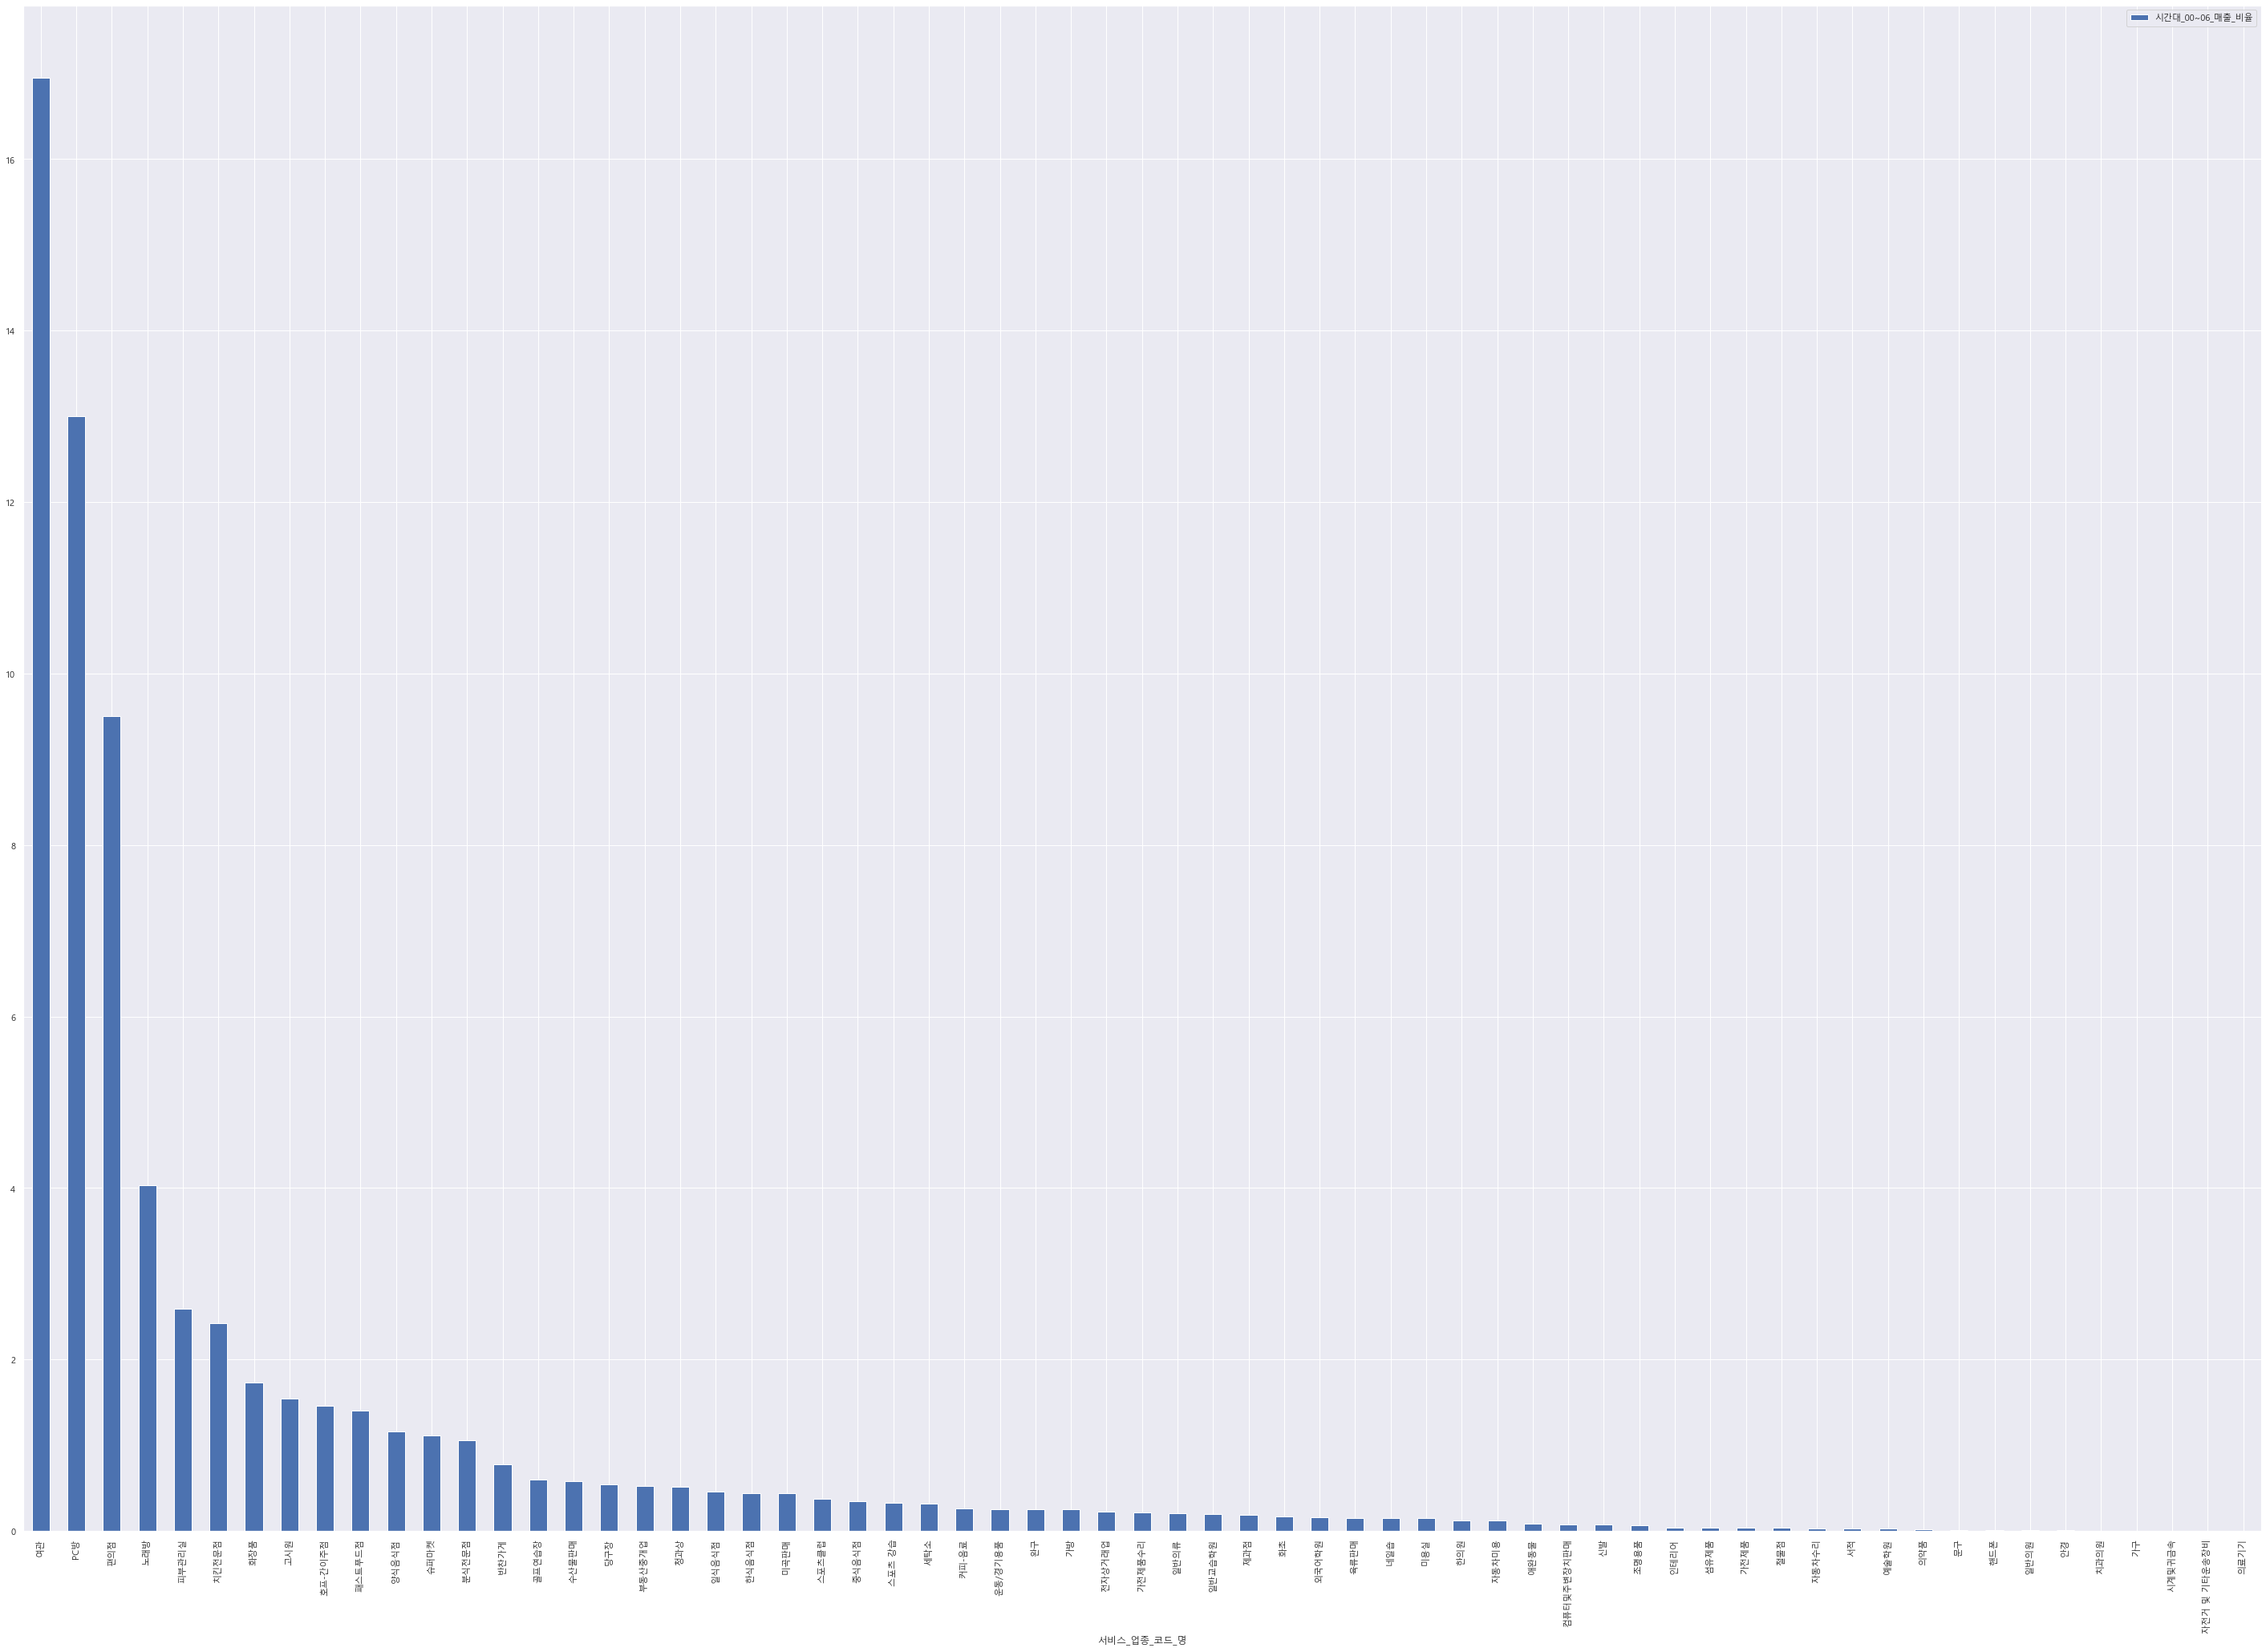

In [61]:
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

time.sort_values(by=['시간대_00~06_매출_비율'],ascending=False).plot(kind='bar',x='서비스_업종_코드_명',y='시간대_00~06_매출_비율')

In [63]:
age=slice2021.groupby('서비스_업종_코드_명')[['연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율']].mean()
age=age.reset_index()

In [64]:
age.head(3)

,서비스_업종_코드_명,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,PC방,7.102703,58.450000,21.277027,6.647297,5.186486,1.483784
1,가구,0.056300,3.739946,12.294906,20.579088,30.061662,31.530831
2,가방,0.492958,11.633803,15.699531,16.483568,26.051643,27.845070


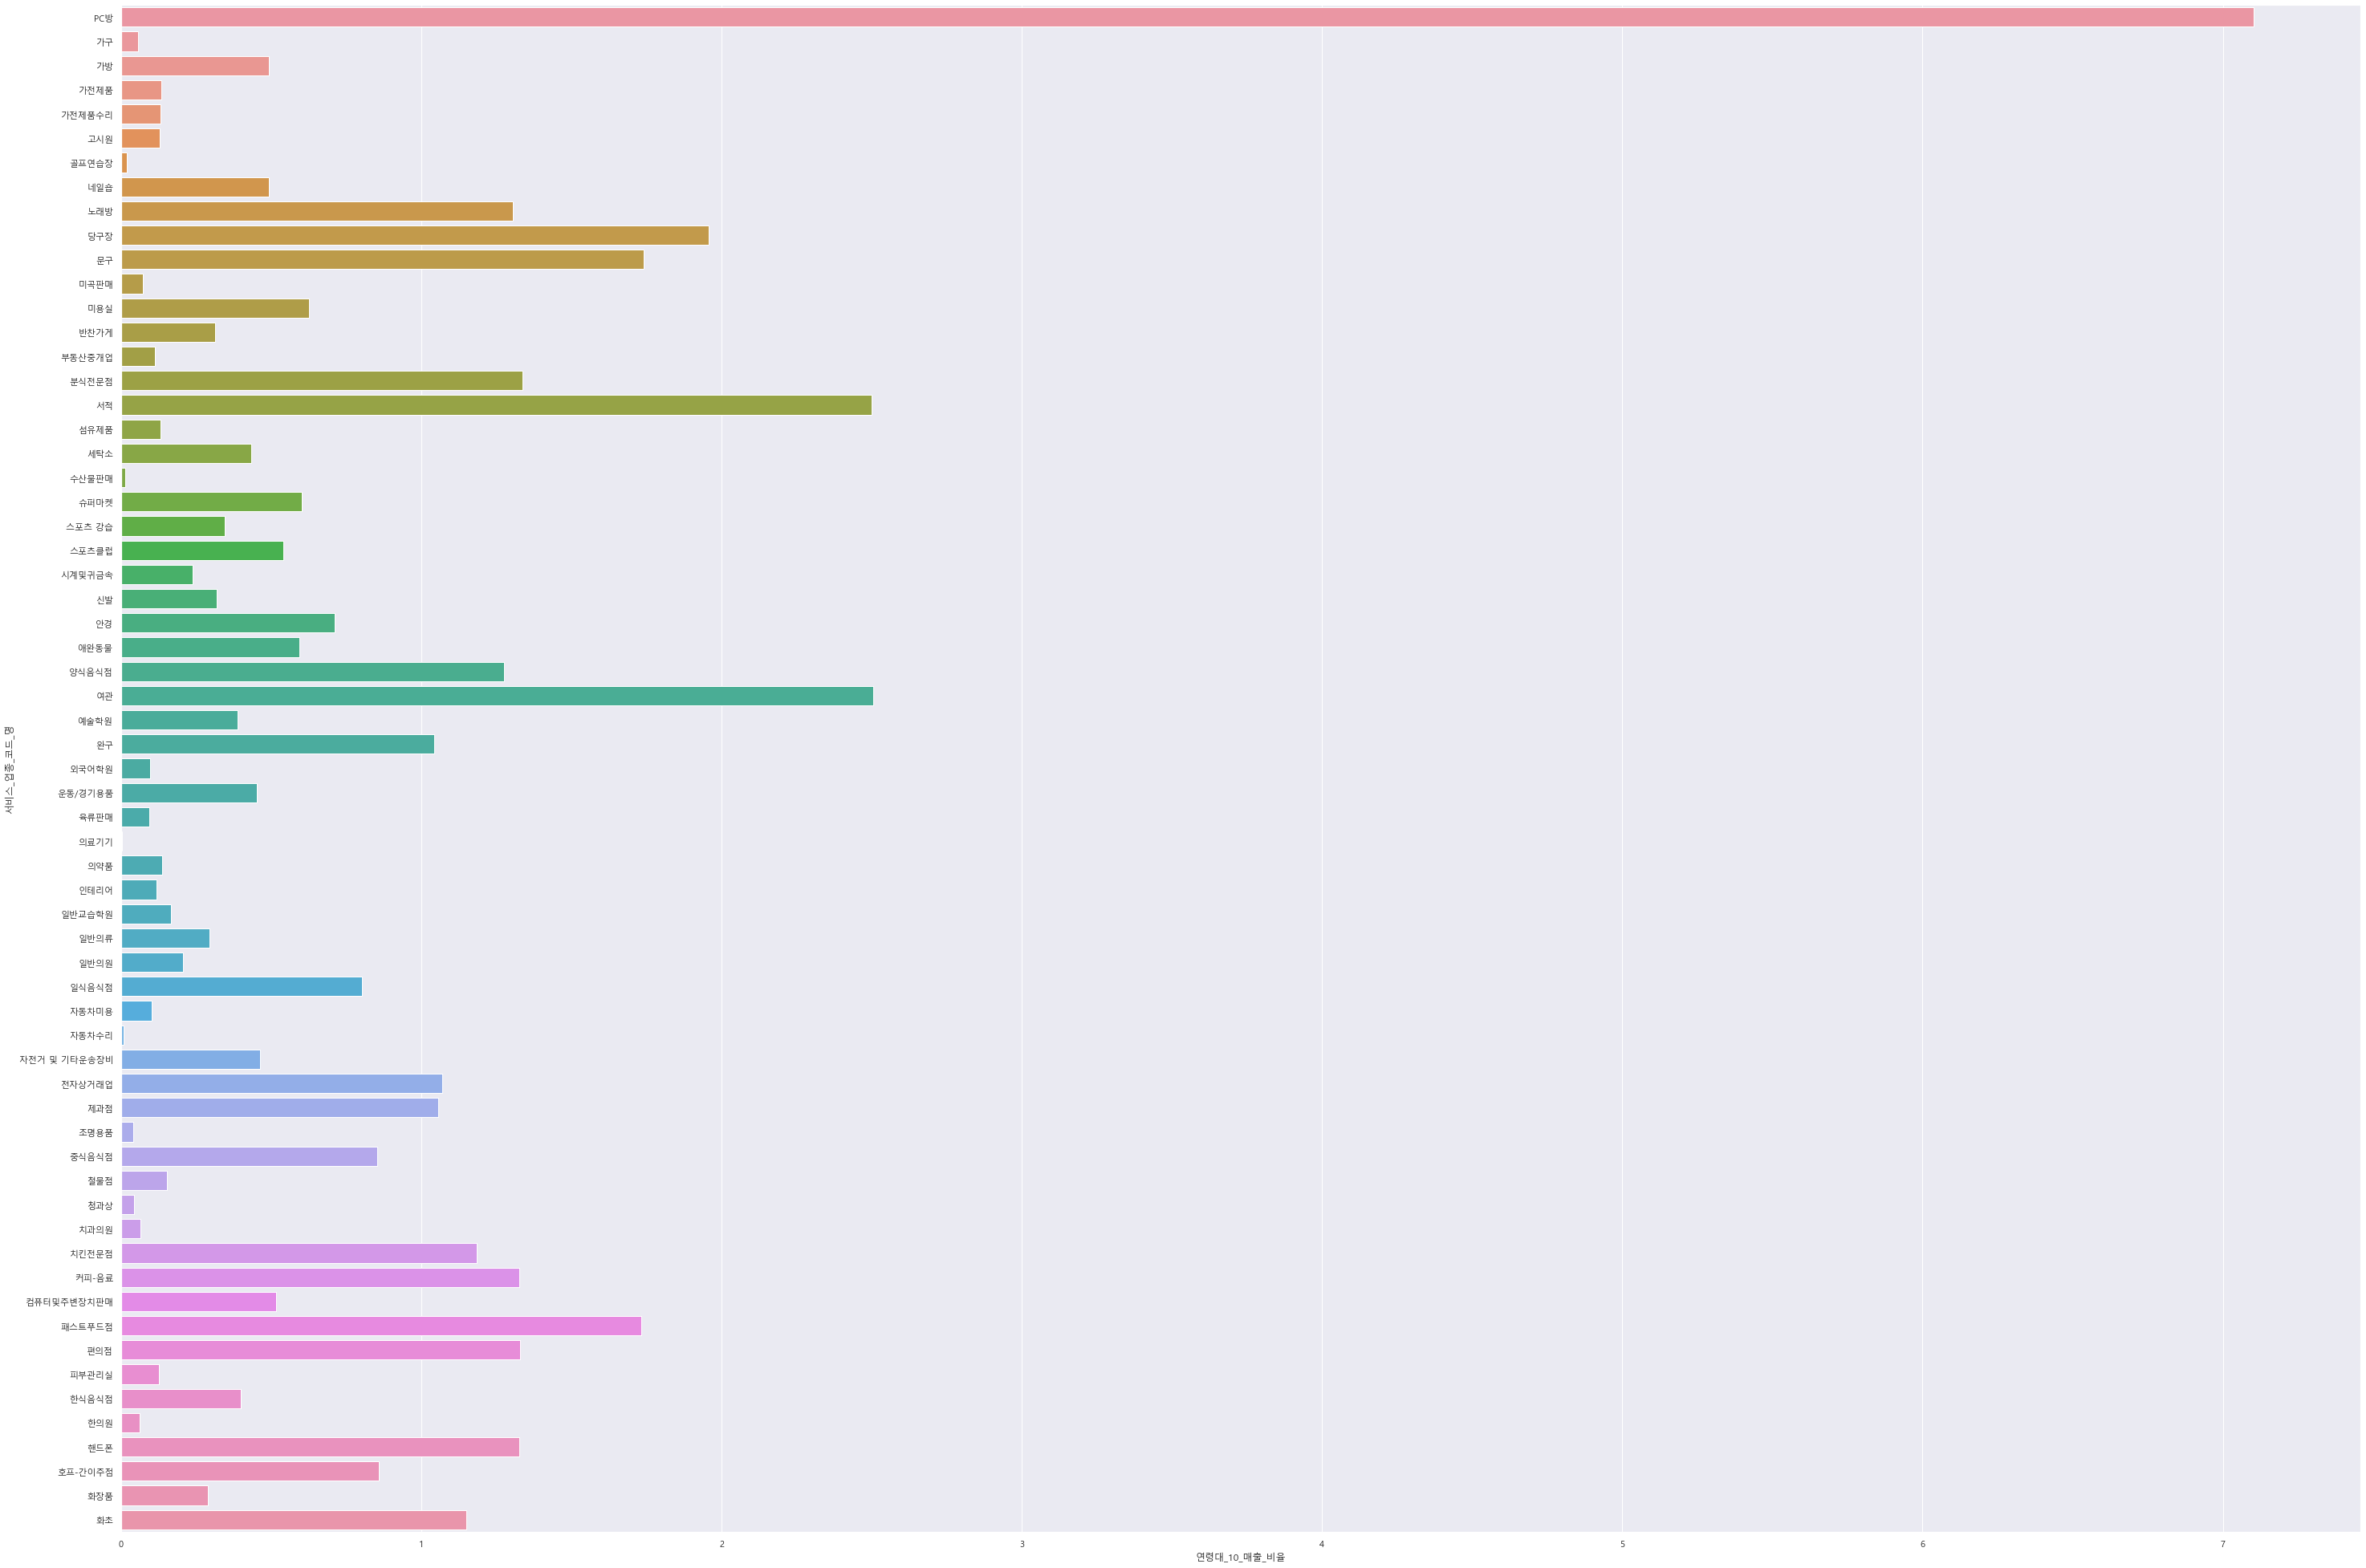

In [65]:
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)
sns.barplot(data=age,x='연령대_10_매출_비율',y='서비스_업종_코드_명')
sns.set(rc = {'figure.figsize':(50,35)})
plt.rc
plt.show()

In [91]:
# seaborn 그래프 표현을 위해 정렬시 사용하는 코드
age.sort_values(by=['연령대_10_매출_비율'],axis=0,ascending=False)
# 상위 20개만 추출
ages=age[:20]


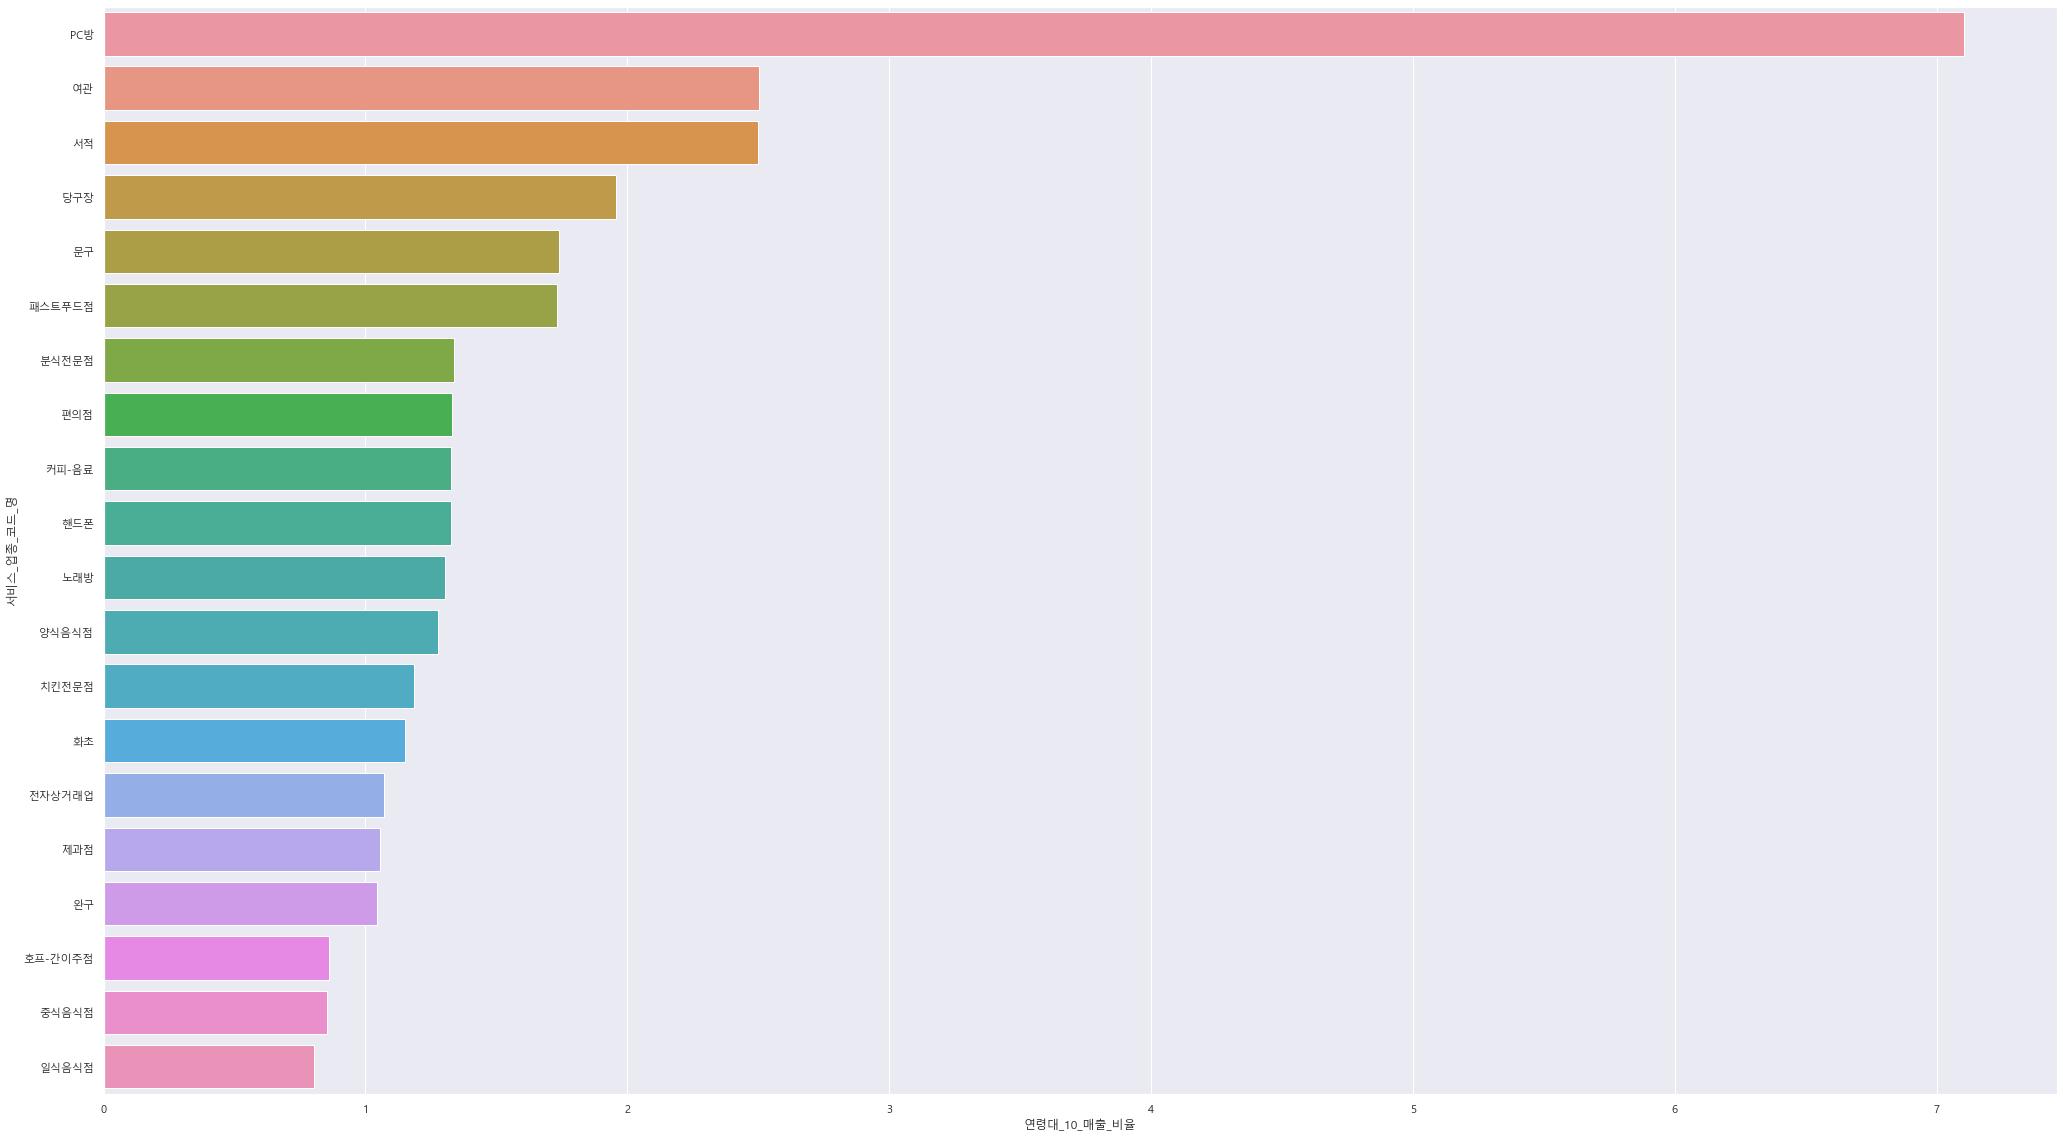

In [92]:
# 그래프로 시각화
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)
sns.barplot(data=ages,x='연령대_10_매출_비율',y='서비스_업종_코드_명')
sns.set(rc = {'figure.figsize':(35,20)})
plt.show()